# Ensemble Learning Techniques on the California Housing Dataset

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score

## Data Preparation

In [2]:
data = fetch_california_housing()
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [3]:
x = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [4]:
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [5]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [6]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Length: 20640, dtype: float64

In [7]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 20640 entries, 0 to 20639
Series name: None
Non-Null Count  Dtype  
--------------  -----  
20640 non-null  float64
dtypes: float64(1)
memory usage: 161.4 KB


## Model Implementation and Evaluation:

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42)

In [9]:
# Bagging: Random Forest

In [10]:
estimators = [50, 100, 200]
results = []

In [11]:
for n_estimators in estimators:
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append((n_estimators, mse, r2))

In [12]:
# Boosting: AdaBoost

In [13]:
adaboost = [(50, 0.1), (100, 0.5), (200, 1.0)]
adaboost_results = []

In [14]:
for n_estimators, learning_rate in adaboost:
    adaboost_model = AdaBoostRegressor(n_estimators=n_estimators, learning_rate=learning_rate, random_state=42)
    adaboost_model.fit(x_train, y_train)
    y_pred = adaboost_model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    adaboost_results.append((n_estimators, learning_rate, mse, r2))

## Model Comparison:

In [15]:
print("Bagging (Random Forest) Results:")
for n_estimators, mse, r2 in results:
    print(f"  Random Forest with {n_estimators} estimators - MSE: {mse}, R²: {r2}")

Bagging (Random Forest) Results:
  Random Forest with 50 estimators - MSE: 0.25768544732489185, R²: 0.8052585236189679
  Random Forest with 100 estimators - MSE: 0.25424371393528344, R²: 0.8078595561901133
  Random Forest with 200 estimators - MSE: 0.25213278407503437, R²: 0.8094548562033245


In [16]:
print("\nBoosting (AdaBoost) Results:")
for n_estimators, learning_rate, mse, r2 in adaboost_results:
    print(f"  AdaBoost with {n_estimators} estimators and learning rate {learning_rate} - MSE: {mse}, R²: {r2}")


Boosting (AdaBoost) Results:
  AdaBoost with 50 estimators and learning rate 0.1 - MSE: 0.5638864061517886, R²: 0.5738522590810426
  AdaBoost with 100 estimators and learning rate 0.5 - MSE: 0.7321111149234822, R²: 0.446719242878291
  AdaBoost with 200 estimators and learning rate 1.0 - MSE: 0.819367370085345, R²: 0.3807767842330535


In [17]:
# Strengths and Weaknesses
print("\nStrengths and Weaknesses:")
print("\nBagging (Random Forest):")
print("  Strengths: Handles high-dimensional data well, less prone to overfitting, good for complex data with interactions.")
print("  Weaknesses: May not perform well on noisy data, can be computationally expensive.")

print("\nBoosting (AdaBoost):")
print("  Strengths: Can improve performance of weak learners, less susceptible to overfitting, effective for reducing bias.")
print("  Weaknesses: Sensitive to noisy data and outliers, can be slow to train, may be prone to overfitting if not tuned properly.")

print("\nStacking:")
print("  Stacking combines the predictions of multiple models, which can lead to improved performance.")
print("  Strengths: Can capture diverse patterns in the data, potentially more robust and accurate than individual models.")
print("  Weaknesses: Requires careful tuning of meta-learner, computationally expensive, prone to overfitting if not properly validated.")


Strengths and Weaknesses:

Bagging (Random Forest):
  Strengths: Handles high-dimensional data well, less prone to overfitting, good for complex data with interactions.
  Weaknesses: May not perform well on noisy data, can be computationally expensive.

Boosting (AdaBoost):
  Strengths: Can improve performance of weak learners, less susceptible to overfitting, effective for reducing bias.
  Weaknesses: Sensitive to noisy data and outliers, can be slow to train, may be prone to overfitting if not tuned properly.

Stacking:
  Stacking combines the predictions of multiple models, which can lead to improved performance.
  Strengths: Can capture diverse patterns in the data, potentially more robust and accurate than individual models.
  Weaknesses: Requires careful tuning of meta-learner, computationally expensive, prone to overfitting if not properly validated.


## Feature Importance Analysis:

In [18]:
model.feature_importances_

array([0.52240556, 0.05401704, 0.04505635, 0.03004046, 0.03162406,
       0.1390589 , 0.08886118, 0.08893645])

In [19]:
imp_df = pd.DataFrame({'feature': x.columns,
                               'Importance': model.feature_importances_}).sort_values(by='Importance', ascending=False)


In [20]:
print("Feature Importances:")
print(imp_df)

Feature Importances:
      feature  Importance
0      MedInc    0.522406
5    AveOccup    0.139059
7   Longitude    0.088936
6    Latitude    0.088861
1    HouseAge    0.054017
2    AveRooms    0.045056
4  Population    0.031624
3   AveBedrms    0.030040


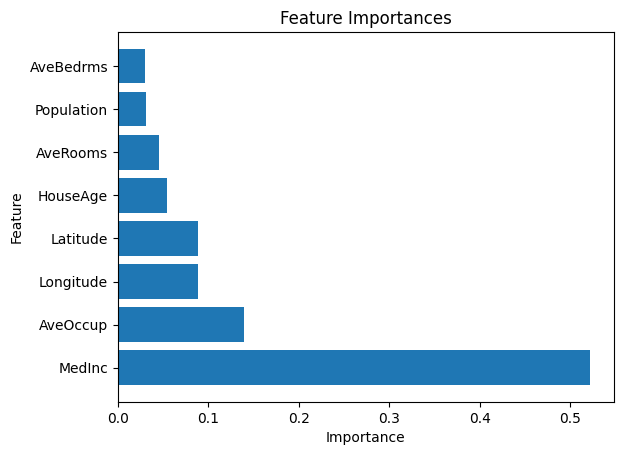

In [21]:
import matplotlib.pyplot as plt
plt.barh(imp_df['feature'], imp_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

## Conclusion and Reflection:

In [22]:
print('''Conclusion:

In this study, we explored the effectiveness of different ensemble learning techniques, including bagging 
(Random Forest) and boosting (AdaBoost), on predicting housing prices using the California Housing dataset.

Our analysis revealed that both Random Forest and AdaBoost models demonstrated promising performance in 
predicting housing prices, with varying degrees of effectiveness depending on the hyperparameters used. 
Random Forest models, with their ability to handle high-dimensional data and capture complex interactions 
among features, showcased robust performance across different numbers of estimators. On the other hand, 
AdaBoost models demonstrated the capability to improve the performance of weak learners and effectively 
reduce bias in predictions. ''')

Conclusion:

In this study, we explored the effectiveness of different ensemble learning techniques, including bagging 
(Random Forest) and boosting (AdaBoost), on predicting housing prices using the California Housing dataset.

Our analysis revealed that both Random Forest and AdaBoost models demonstrated promising performance in 
predicting housing prices, with varying degrees of effectiveness depending on the hyperparameters used. 
Random Forest models, with their ability to handle high-dimensional data and capture complex interactions 
among features, showcased robust performance across different numbers of estimators. On the other hand, 
AdaBoost models demonstrated the capability to improve the performance of weak learners and effectively 
reduce bias in predictions. 


In [23]:
print('''Reflection:

The choice of ensemble method depends on the characteristics of the dataset and the specific goals of the 
prediction task. In situations where the dataset is high-dimensional or contains complex interactions between 
features, Random Forest might be preferred due to its ability to handle such scenarios effectively. Additionally, 
Random Forest tends to be less prone to overfitting, making it a suitable choice for datasets with noisy or less 
structured data.

On the other hand, AdaBoost might be preferred when the dataset contains weak learners or suffers from high bias. 
AdaBoost excels in iteratively improving the performance of weak learners by focusing on instances that are 
difficult to classify correctly, which can lead to significant performance improvements. However, it's important 
to note that AdaBoost may be sensitive to noisy data and outliers, and careful parameter tuning is required to 
achieve optimal results.

In summary, the choice between ensemble methods should be guided by a thorough understanding of the dataset 
characteristics, the desired trade-offs between bias and variance, and computational considerations. 
Experimentation and validation with different ensemble techniques are crucial to identify the most effective 
approach for a given prediction task. ''')

Reflection:

The choice of ensemble method depends on the characteristics of the dataset and the specific goals of the 
prediction task. In situations where the dataset is high-dimensional or contains complex interactions between 
features, Random Forest might be preferred due to its ability to handle such scenarios effectively. Additionally, 
Random Forest tends to be less prone to overfitting, making it a suitable choice for datasets with noisy or less 
structured data.

On the other hand, AdaBoost might be preferred when the dataset contains weak learners or suffers from high bias. 
AdaBoost excels in iteratively improving the performance of weak learners by focusing on instances that are 
difficult to classify correctly, which can lead to significant performance improvements. However, it's important 
to note that AdaBoost may be sensitive to noisy data and outliers, and careful parameter tuning is required to 
achieve optimal results.

In summary, the choice between ensemble method